<a href="https://colab.research.google.com/github/dhanusree-png/colab/blob/main/Copy_of_Welcome_To_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving company_sales_data.csv to company_sales_data (1).csv
   month_number  facecream  facewash  toothpaste  bathingsoap  shampoo  \
0             1       2500      1500        5200         9200     1200   
1             2       2630      1200        5100         6100     2100   
2             3       2140      1340        4550         9550     3550   
3             4       3400      1130        5870         8870     1870   
4             5       3600      1740        4560         7760     1560   

   moisturizer  total_units  total_profit  
0         1500        21100        211000  
1         1200        18330        183300  
2         1340        22470        224700  
3         1130        22270        222700  
4         1740        20960        209600  
Index(['month_number', 'facecream', 'facewash', 'toothpaste', 'bathingsoap',
       'shampoo', 'moisturizer', 'total_units', 'total_profit'],
      dtype='object')


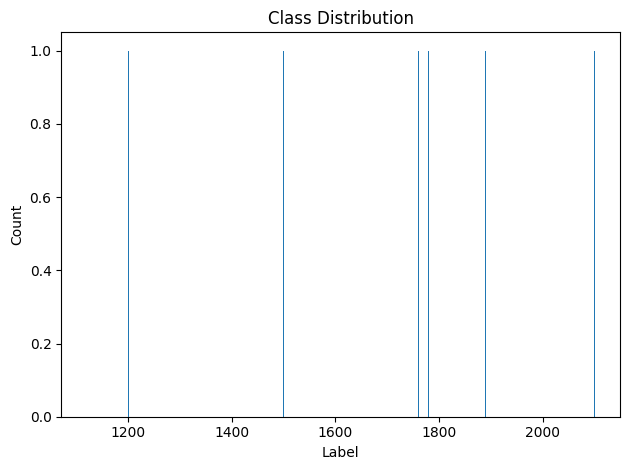

Accuracy: 0.0
Confusion Matrix:
 [[0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]]


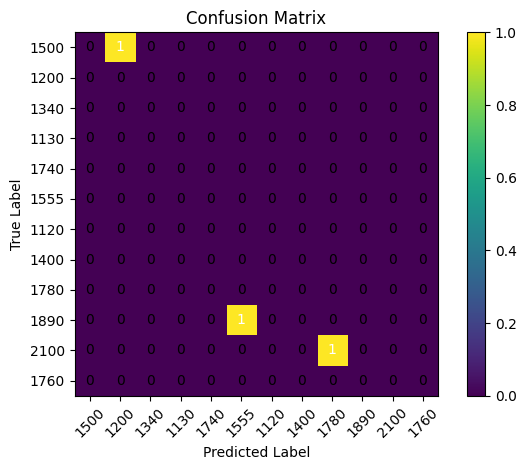

ROC curve skipped (more than 2 classes).


In [2]:

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from google.colab import files

uploaded = files.upload()
file_name = list(uploaded.keys())[0]
df = pd.read_csv(file_name)

print(df.head())
print(df.columns)

label_counts = df['facewash'].value_counts()
plt.figure()
plt.bar(label_counts.index, label_counts.values)
plt.title("Class Distribution")
plt.xlabel("Label")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

X = df.drop('facewash', axis=1)
y = df['facewash']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Convert each row of the DataFrame into a single string for TF-IDF vectorization
X_train_text = X_train.astype(str).agg(' '.join, axis=1)
X_test_text = X_test.astype(str).agg(' '.join, axis=1)

vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train_text)
X_test_vec = vectorizer.transform(X_test_text)

model = MultinomialNB()
model.fit(X_train_vec, y_train)

predictions = model.predict(X_test_vec)
acc = accuracy_score(y_test, predictions)
print("Accuracy:", acc)

def check_spam(msg):
    # The example function check_spam is not relevant for this dataset
    # and would require an actual text input similar to the original problem.
    # For this network traffic dataset, a direct string input is not suitable
    # unless a specific column or combination of columns is treated as text.
    # For demonstration, we'll keep it but acknowledge it's not directly applicable
    # to the current dataset's features unless a similar text transformation is applied.
    # For instance, if 'msg' was a concatenated string of features from a single new flow.
    return "Prediction not applicable to example due to data type mismatch"



cm = confusion_matrix(y_test, predictions, labels=y.unique())
print("Confusion Matrix:\n", cm)

plt.figure()
plt.imshow(cm, interpolation='nearest')
plt.title("Confusion Matrix")
plt.colorbar()
tick_marks = np.arange(len(y.unique()))
plt.xticks(tick_marks, y.unique(), rotation=45)
plt.yticks(tick_marks, y.unique())

for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i,j],
                 ha="center", va="center",
                 color="white" if cm[i,j] > cm.max()/2 else "black")

plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.show()

if len(y.unique()) == 2:
    y_test_binary = (y_test == y.unique()[1]).astype(int)
    y_prob = model.predict_proba(X_test_vec)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test_binary, y_prob)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, label=f"ROC Curve (AUC={roc_auc:.3f})")
    plt.plot([0,1],[0,1],'--')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve")
    plt.legend(loc="lower right")
    plt.tight_layout()
    plt.show()
else:
    print("ROC curve skipped (more than 2 classes).")


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
Messages=[
    "Congratulations you have won a lottery",
    "win cash now.click here",
    "you have been selected for a free gift",
    "hello how are you",
    "Are you cominb to college",
    "Lets meet tomorrow",
    "Free entry in a contest",
    "Call this number to claim the reward",
    "Can we meet today",
    "Please send the report","offer"
]
labels=[
    "spam",
    "spam",
    "spam",
    "Not a spam",
    "Not a spam",
    "Not a spam",
    "spam",
    "spam",
    "Not a spam",
    "Not a spam","spam"
]
cv=CountVectorizer()
X=cv.fit_transform(Messages)
x_train,x_test,y_train,y_test=train_test_split(X,labels,test_size=0.2,random_state=42)

model=MultinomialNB()
model.fit(x_train,y_train)

user_input=input("Enter your message : ")
input_vec=cv.transform([user_input])
prediction=model.predict(input_vec)
print("\nprediction :",prediction[0])

Enter your message : Can we meet today

prediction : Not a spam


In [ ]:
import pandas as pd
from google.colab import files
files.upload()
data=pd.read_csv(r"Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv"),
data

Saving Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv to Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX (1).csv


(         Destination Port   Flow Duration   Total Fwd Packets  \
 0                     389       113095465                  48   
 1                     389       113473706                  68   
 2                       0       119945515                 150   
 3                     443        60261928                   9   
 4                      53             269                   2   
 ...                   ...             ...                 ...   
 170361              55641              49                   1   
 170362              45337             217                   2   
 170363                 22         1387547                  41   
 170364                 22             207                   1   
 170365              60146              50                   1   
 
          Total Backward Packets  Total Length of Fwd Packets  \
 0                            24                         9668   
 1                            40                        11364   
 2         

In [ ]:
data[0].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170366 entries, 0 to 170365
Data columns (total 79 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0    Destination Port             170366 non-null  int64  
 1    Flow Duration                170366 non-null  int64  
 2    Total Fwd Packets            170366 non-null  int64  
 3    Total Backward Packets       170366 non-null  int64  
 4   Total Length of Fwd Packets   170366 non-null  int64  
 5    Total Length of Bwd Packets  170366 non-null  int64  
 6    Fwd Packet Length Max        170366 non-null  int64  
 7    Fwd Packet Length Min        170366 non-null  int64  
 8    Fwd Packet Length Mean       170366 non-null  float64
 9    Fwd Packet Length Std        170366 non-null  float64
 10  Bwd Packet Length Max         170366 non-null  int64  
 11   Bwd Packet Length Min        170366 non-null  int64  
 12   Bwd Packet Length Mean       170366 non-nul

In [ ]:
df = pd.DataFrame(data[0])
df

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,389,113095465,48,24,9668,10012,403,0,201.416667,203.548293,...,32,203985.500,5.758373e+05,1629110,379,13800000.0,4.277541e+06,16500000,6737603,BENIGN
1,389,113473706,68,40,11364,12718,403,0,167.117647,171.919413,...,32,178326.875,5.034269e+05,1424245,325,13800000.0,4.229413e+06,16500000,6945512,BENIGN
2,0,119945515,150,0,0,0,0,0,0.000000,0.000000,...,0,6909777.333,1.170000e+07,20400000,6,24400000.0,2.430000e+07,60100000,5702188,BENIGN
3,443,60261928,9,7,2330,4221,1093,0,258.888889,409.702161,...,20,0.000,0.000000e+00,0,0,0.0,0.000000e+00,0,0,BENIGN
4,53,269,2,2,102,322,51,51,51.000000,0.000000,...,32,0.000,0.000000e+00,0,0,0.0,0.000000e+00,0,0,BENIGN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170361,55641,49,1,3,6,18,6,6,6.000000,0.000000,...,20,0.000,0.000000e+00,0,0,0.0,0.000000e+00,0,0,BENIGN
170362,45337,217,2,1,31,6,31,0,15.500000,21.920310,...,32,0.000,0.000000e+00,0,0,0.0,0.000000e+00,0,0,BENIGN
170363,22,1387547,41,46,2728,6634,456,0,66.536585,110.129945,...,32,0.000,0.000000e+00,0,0,0.0,0.000000e+00,0,0,BENIGN
170364,22,207,1,1,0,0,0,0,0.000000,0.000000,...,32,0.000,0.000000e+00,0,0,0.0,0.000000e+00,0,0,BENIGN


In [ ]:
data[0].isnull()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170361,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
170362,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
170363,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
170364,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
df.isnull().sum()

,0
Destination Port,0
Flow Duration,0
Total Fwd Packets,0
Total Backward Packets,0
Total Length of Fwd Packets,0
...,...
Idle Mean,0
Idle Std,0
Idle Max,0
Idle Min,0


In [ ]:
df.duplicated().sum()

np.int64(6066)

In [ ]:
df.drop_duplicates()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,389,113095465,48,24,9668,10012,403,0,201.416667,203.548293,...,32,203985.500,5.758373e+05,1629110,379,13800000.0,4.277541e+06,16500000,6737603,BENIGN
1,389,113473706,68,40,11364,12718,403,0,167.117647,171.919413,...,32,178326.875,5.034269e+05,1424245,325,13800000.0,4.229413e+06,16500000,6945512,BENIGN
2,0,119945515,150,0,0,0,0,0,0.000000,0.000000,...,0,6909777.333,1.170000e+07,20400000,6,24400000.0,2.430000e+07,60100000,5702188,BENIGN
3,443,60261928,9,7,2330,4221,1093,0,258.888889,409.702161,...,20,0.000,0.000000e+00,0,0,0.0,0.000000e+00,0,0,BENIGN
4,53,269,2,2,102,322,51,51,51.000000,0.000000,...,32,0.000,0.000000e+00,0,0,0.0,0.000000e+00,0,0,BENIGN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170360,443,181,3,1,18,6,6,6,6.000000,0.000000,...,20,0.000,0.000000e+00,0,0,0.0,0.000000e+00,0,0,BENIGN
170361,55641,49,1,3,6,18,6,6,6.000000,0.000000,...,20,0.000,0.000000e+00,0,0,0.0,0.000000e+00,0,0,BENIGN
170362,45337,217,2,1,31,6,31,0,15.500000,21.920310,...,32,0.000,0.000000e+00,0,0,0.0,0.000000e+00,0,0,BENIGN
170363,22,1387547,41,46,2728,6634,456,0,66.536585,110.129945,...,32,0.000,0.000000e+00,0,0,0.0,0.000000e+00,0,0,BENIGN


In [ ]:
df.drop_duplicates()
df


,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,389,113095465,48,24,9668,10012,403,0,201.416667,203.548293,...,32,203985.500,5.758373e+05,1629110,379,13800000.0,4.277541e+06,16500000,6737603,BENIGN
1,389,113473706,68,40,11364,12718,403,0,167.117647,171.919413,...,32,178326.875,5.034269e+05,1424245,325,13800000.0,4.229413e+06,16500000,6945512,BENIGN
2,0,119945515,150,0,0,0,0,0,0.000000,0.000000,...,0,6909777.333,1.170000e+07,20400000,6,24400000.0,2.430000e+07,60100000,5702188,BENIGN
3,443,60261928,9,7,2330,4221,1093,0,258.888889,409.702161,...,20,0.000,0.000000e+00,0,0,0.0,0.000000e+00,0,0,BENIGN
4,53,269,2,2,102,322,51,51,51.000000,0.000000,...,32,0.000,0.000000e+00,0,0,0.0,0.000000e+00,0,0,BENIGN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170361,55641,49,1,3,6,18,6,6,6.000000,0.000000,...,20,0.000,0.000000e+00,0,0,0.0,0.000000e+00,0,0,BENIGN
170362,45337,217,2,1,31,6,31,0,15.500000,21.920310,...,32,0.000,0.000000e+00,0,0,0.0,0.000000e+00,0,0,BENIGN
170363,22,1387547,41,46,2728,6634,456,0,66.536585,110.129945,...,32,0.000,0.000000e+00,0,0,0.0,0.000000e+00,0,0,BENIGN
170364,22,207,1,1,0,0,0,0,0.000000,0.000000,...,32,0.000,0.000000e+00,0,0,0.0,0.000000e+00,0,0,BENIGN


In [ ]:
df.describe()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
count,170366.000000,1.703660e+05,170366.000000,170366.000000,1.703660e+05,1.703660e+05,170366.000000,170366.000000,170366.000000,170366.000000,...,170366.000000,170366.000000,1.703660e+05,1.703660e+05,1.703660e+05,1.703660e+05,1.703660e+05,1.703660e+05,1.703660e+05,1.703660e+05
mean,7897.090599,1.246354e+07,15.124620,18.022276,5.569859e+02,3.183147e+04,167.775982,22.697786,48.233250,47.235628,...,11.925108,25.584506,7.433804e+04,4.676038e+04,1.646422e+05,5.012699e+04,3.690478e+06,1.310724e+05,3.784764e+06,3.543232e+06
std,18235.489428,3.193852e+07,1123.107756,1494.492871,7.710431e+03,3.460816e+06,461.299214,37.990783,94.947821,141.927429,...,1077.898793,6.354041,6.182048e+05,3.689605e+05,9.958673e+05,5.606797e+05,1.298830e+07,1.733767e+06,1.325135e+07,1.284183e+07
min,0.000000,-1.000000e+00,1.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,53.000000,1.920000e+02,1.000000,1.000000,3.100000e+01,6.000000e+00,23.000000,0.000000,7.882314,0.000000,...,0.000000,20.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,80.000000,3.141200e+04,2.000000,2.000000,6.800000e+01,1.340000e+02,41.000000,6.000000,38.000000,0.000000,...,1.000000,20.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,443.000000,8.169818e+05,4.000000,2.000000,1.480000e+02,3.280000e+02,60.000000,41.000000,50.000000,17.897858,...,3.000000,32.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,65529.000000,1.200000e+08,200755.000000,270686.000000,1.197199e+06,6.270000e+08,23360.000000,1729.000000,4183.057143,5463.493850,...,192491.000000,60.000000,1.030000e+08,6.370000e+07,1.030000e+08,1.030000e+08,1.200000e+08,7.260000e+07,1.200000e+08,1.200000e+08


In [ ]:
df.dropna()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,389,113095465,48,24,9668,10012,403,0,201.416667,203.548293,...,32,203985.500,5.758373e+05,1629110,379,13800000.0,4.277541e+06,16500000,6737603,BENIGN
1,389,113473706,68,40,11364,12718,403,0,167.117647,171.919413,...,32,178326.875,5.034269e+05,1424245,325,13800000.0,4.229413e+06,16500000,6945512,BENIGN
2,0,119945515,150,0,0,0,0,0,0.000000,0.000000,...,0,6909777.333,1.170000e+07,20400000,6,24400000.0,2.430000e+07,60100000,5702188,BENIGN
3,443,60261928,9,7,2330,4221,1093,0,258.888889,409.702161,...,20,0.000,0.000000e+00,0,0,0.0,0.000000e+00,0,0,BENIGN
4,53,269,2,2,102,322,51,51,51.000000,0.000000,...,32,0.000,0.000000e+00,0,0,0.0,0.000000e+00,0,0,BENIGN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170361,55641,49,1,3,6,18,6,6,6.000000,0.000000,...,20,0.000,0.000000e+00,0,0,0.0,0.000000e+00,0,0,BENIGN
170362,45337,217,2,1,31,6,31,0,15.500000,21.920310,...,32,0.000,0.000000e+00,0,0,0.0,0.000000e+00,0,0,BENIGN
170363,22,1387547,41,46,2728,6634,456,0,66.536585,110.129945,...,32,0.000,0.000000e+00,0,0,0.0,0.000000e+00,0,0,BENIGN
170364,22,207,1,1,0,0,0,0,0.000000,0.000000,...,32,0.000,0.000000e+00,0,0,0.0,0.000000e+00,0,0,BENIGN


In [ ]:
avg = df[' Active Max']
avg

,Active Max
0,1629110
1,1424245
2,20400000
3,0
4,0
...,...
170361,0
170362,0
170363,0
170364,0


In [ ]:
df.fillna(avg)

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,389,113095465,48,24,9668,10012,403,0,201.416667,203.548293,...,32,203985.500,5.758373e+05,1629110,379,13800000.0,4.277541e+06,16500000,6737603,BENIGN
1,389,113473706,68,40,11364,12718,403,0,167.117647,171.919413,...,32,178326.875,5.034269e+05,1424245,325,13800000.0,4.229413e+06,16500000,6945512,BENIGN
2,0,119945515,150,0,0,0,0,0,0.000000,0.000000,...,0,6909777.333,1.170000e+07,20400000,6,24400000.0,2.430000e+07,60100000,5702188,BENIGN
3,443,60261928,9,7,2330,4221,1093,0,258.888889,409.702161,...,20,0.000,0.000000e+00,0,0,0.0,0.000000e+00,0,0,BENIGN
4,53,269,2,2,102,322,51,51,51.000000,0.000000,...,32,0.000,0.000000e+00,0,0,0.0,0.000000e+00,0,0,BENIGN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170361,55641,49,1,3,6,18,6,6,6.000000,0.000000,...,20,0.000,0.000000e+00,0,0,0.0,0.000000e+00,0,0,BENIGN
170362,45337,217,2,1,31,6,31,0,15.500000,21.920310,...,32,0.000,0.000000e+00,0,0,0.0,0.000000e+00,0,0,BENIGN
170363,22,1387547,41,46,2728,6634,456,0,66.536585,110.129945,...,32,0.000,0.000000e+00,0,0,0.0,0.000000e+00,0,0,BENIGN
170364,22,207,1,1,0,0,0,0,0.000000,0.000000,...,32,0.000,0.000000e+00,0,0,0.0,0.000000e+00,0,0,BENIGN


In [ ]:
df[' Active Max'].fillna(avg,inplace=True)

/tmp/ipython-input-1838884293.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[' Active Max'].fillna(avg,inplace=True)


In [ ]:
df

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,389,113095465,48,24,9668,10012,403,0,201.416667,203.548293,...,32,203985.500,5.758373e+05,1629110,379,13800000.0,4.277541e+06,16500000,6737603,BENIGN
1,389,113473706,68,40,11364,12718,403,0,167.117647,171.919413,...,32,178326.875,5.034269e+05,1424245,325,13800000.0,4.229413e+06,16500000,6945512,BENIGN
2,0,119945515,150,0,0,0,0,0,0.000000,0.000000,...,0,6909777.333,1.170000e+07,20400000,6,24400000.0,2.430000e+07,60100000,5702188,BENIGN
3,443,60261928,9,7,2330,4221,1093,0,258.888889,409.702161,...,20,0.000,0.000000e+00,0,0,0.0,0.000000e+00,0,0,BENIGN
4,53,269,2,2,102,322,51,51,51.000000,0.000000,...,32,0.000,0.000000e+00,0,0,0.0,0.000000e+00,0,0,BENIGN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170361,55641,49,1,3,6,18,6,6,6.000000,0.000000,...,20,0.000,0.000000e+00,0,0,0.0,0.000000e+00,0,0,BENIGN
170362,45337,217,2,1,31,6,31,0,15.500000,21.920310,...,32,0.000,0.000000e+00,0,0,0.0,0.000000e+00,0,0,BENIGN
170363,22,1387547,41,46,2728,6634,456,0,66.536585,110.129945,...,32,0.000,0.000000e+00,0,0,0.0,0.000000e+00,0,0,BENIGN
170364,22,207,1,1,0,0,0,0,0.000000,0.000000,...,32,0.000,0.000000e+00,0,0,0.0,0.000000e+00,0,0,BENIGN


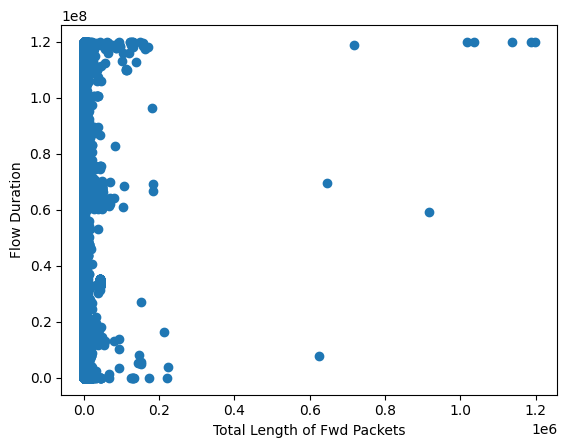

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(df['Total Length of Fwd Packets'], df[' Flow Duration'])
plt.xlabel("Total Length of Fwd Packets") # Updated label to reflect the chosen column
plt.ylabel("Flow Duration")
plt.show()